<a href="https://colab.research.google.com/github/SemenutaEgor/Extreme-events-in-phenomenological-neural-networks-with-different-types-of-connections/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_Dragon_king_like_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#задаём параметры, функцию гамма и саму систему из двух связных нейронов
a = 1
b = 3
c = 1
d = 5
x_r = -1.6
r = 0.01
s = 5
I = 4
v_s = 2
lambd = 10
Theta = -0.25

Gamma = lambda x_i: 1 / (1 + np.exp(-lambd * (x_i - Theta)))

def two_HRs(t, X, k1, k2, k):
    x1, y1, z1, x2, y2, z2  = X
    dx1 = y1 - a*x1**3 + b*x1**2 -z1 + I - k1*(x1 - v_s) * Gamma(x2) + k * (x2 - x1)
    dy1 = c - d*x1**2 - y1
    dz1 = r*(s*(x1 - x_r) - z1)
    
    dx2 = y2 - a*x2**3 + b*x2**2 -z2 + I - k2*(x2 - v_s) * Gamma(x1) + k * (x1 - x2)
    dy2 = c - d*x2**2 - y2
    dz2 = r*(s*(x2 - x_r) - z2)
    return [dx1, dy1, dz1, dx2, dy2, dz2]

In [3]:
k1 = -0.17
k2 = -0.17
k = 0.35

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol1 = solve_ivp(two_HRs, [0, 50000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2, k))
ts1 = sol1.t
x1s1, y1s1, z1s1, x2s1, y2s1, z2s1 = sol1.y

k1 = -0.17
k2 = -0.17
k = 0.2

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol2 = solve_ivp(two_HRs, [0, 50000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2, k))
ts2 = sol2.t
x1s2, y1s2, z1s2, x2s2, y2s2, z2s2 = sol2.y

k1 = -0.17
k2 = -0.17
k = 0.01

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol3 = solve_ivp(two_HRs, [0, 50000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2, k))
ts3 = sol3.t
x1s3, y1s3, z1s3, x2s3, y2s3, z2s3 = sol3.y

In [4]:
x1s1 = np.array(x1s1)
x2s1 = np.array(x2s1)

xsum1 = x1s1 + x2s1

ts1 = ts1[120000:]
xsum1 = xsum1[120000:]

###

x1s2 = np.array(x1s2)
x2s2 = np.array(x2s2)

xsum2 = x1s2 + x2s2

ts2 = ts2[120000:]
xsum2 = xsum2[120000:]

###

x1s3 = np.array(x1s3)
x2s3 = np.array(x2s3)

xsum3 = x1s3 + x2s3

ts3 = ts3[120000:]
xsum3 = xsum3[120000:]

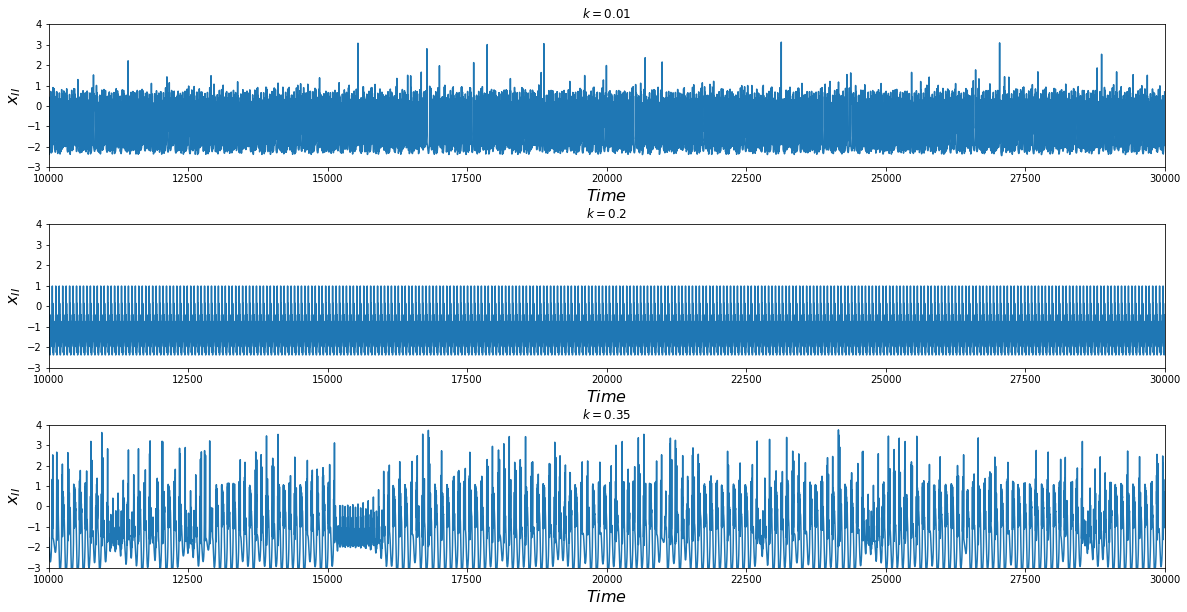

In [14]:
Hee = 4.0

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(3, 1, 1)
ax.plot (ts3, xsum3)
ax.set_ylim(-3, 4) 
ax.set_xlim(10000, 30000)
# plt.axhline(y = Hee, color ="black", linestyle ="--")
# plt.axhline(y = 1.2, color ="red", linestyle ="--")
ax.set_xlabel("$Time$", fontsize=16)
ax.set_ylabel("$x_{II}$", fontsize=16)
plt.title("$k = 0.01$")

ax = fig.add_subplot(3, 1, 2)
ax.plot (ts2, xsum2)
ax.set_ylim(-3, 4) 
ax.set_xlim(10000, 30000) 
# plt.axhline(y = Hee, color ="black", linestyle ="--")
# plt.axhline(y = 1.2, color ="red", linestyle ="--")
ax.set_xlabel("$Time$", fontsize=16)
ax.set_ylabel("$x_{II}$", fontsize=16)
plt.title("$k = 0.2$")

ax = fig.add_subplot(3, 1, 3)
ax.plot (ts1, xsum1)
ax.set_ylim(-3, 4) 
ax.set_xlim(10000, 30000)
# plt.axhline(y = Hee, color ="black", linestyle ="--")
# plt.axhline(y = 1.2, color ="red", linestyle ="--")
ax.set_xlabel("$Time$", fontsize=16)
ax.set_ylabel("$x_{II}$",fontsize=16)
plt.title("$k = 0.35$")

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show();

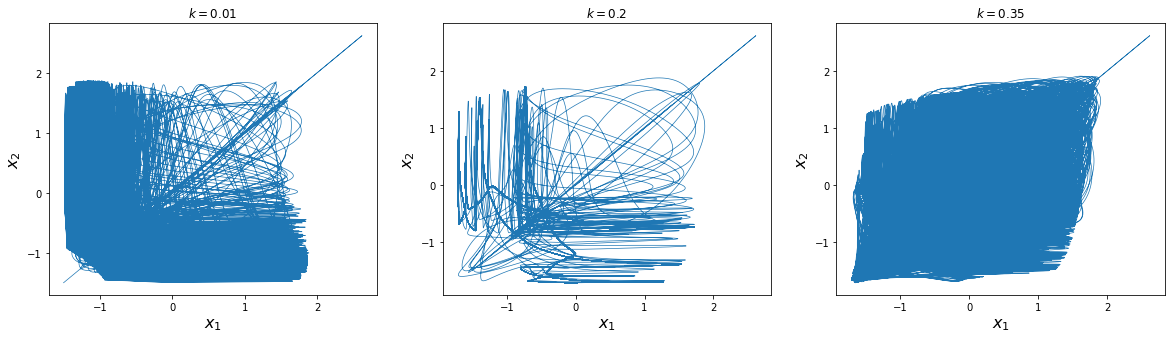

In [6]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 3, 1)
ax.plot(x1s3, x2s3, lw = 0.7)
ax.set_xlabel("$x_{1}$", fontsize=16)
ax.set_ylabel("$x_{2}$", fontsize=16)
plt.title("$k = 0.01$")

ax = fig.add_subplot(1, 3, 2)
ax.plot(x1s2, x2s2, lw = 0.7)
ax.set_xlabel("$x_{1}$", fontsize=16)
ax.set_ylabel("$x_{2}$", fontsize=16)
plt.title("$k = 0.2$")

ax = fig.add_subplot(1, 3, 3)
ax.plot(x1s1, x2s1, lw = 0.7)
ax.set_xlabel("$x_{1}$", fontsize=16)
ax.set_ylabel("$x_{2}$", fontsize=16)
plt.title("$k = 0.35$")

fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show();

In [7]:
Hs = np.linspace(1.2, 4.0, 50000)
eps = 0.09

lents = len(ts1)
lenHs = len(Hs)

all_spikes1 = (xsum1>0).sum()
all_spikes2 = (xsum2>0).sum()
all_spikes3 = (xsum3>0).sum()

spike_counter1 = np.array([((xsum1 >= Hs[j]) & (xsum1 <= Hs[j]+eps)).sum() for j in range(lenHs)])
spike_counter2 = np.array([((xsum2 >= Hs[j]) & (xsum2 <= Hs[j]+eps)).sum() for j in range(lenHs)])
spike_counter3 = np.array([((xsum3 >= Hs[j]) & (xsum3 <= Hs[j]+eps)).sum() for j in range(lenHs)])

prob_arr1 = spike_counter1 / all_spikes1
prob_arr2 = spike_counter2 / all_spikes2
prob_arr3 = spike_counter3 / all_spikes3
print(prob_arr1)
print(prob_arr2)
print(prob_arr3)

# print(all_spikes)
# print(all_spikes1)


[0.02604332 0.02603531 0.02601662 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0.00402009 0.00402371 0.00403097 ... 0.         0.         0.        ]


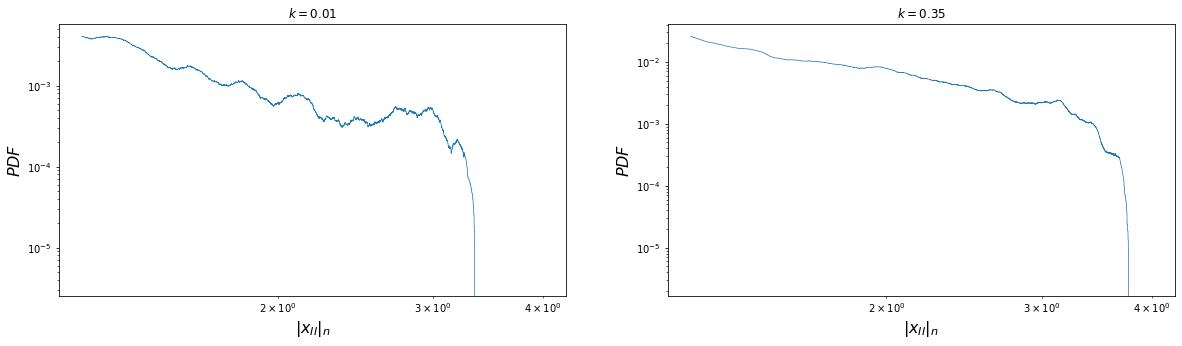

In [15]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(Hs, prob_arr3, lw = 0.7)
ax.set_xscale('log', basex = 10)
ax.set_yscale('log', basey = 10)
ax.set_xlabel("$|x_{II}|_{n}$", fontsize=16)
ax.set_ylabel("$PDF$", fontsize=16)
plt.title("$k = 0.01$")

# ax = fig.add_subplot(1, 3, 2)
# ax.plot(Hs, prob_arr2, lw = 0.7)
# ax.set_xscale('log', basex = 10)
# ax.set_yscale('log', basey = 10)
# ax.set_xlabel("$|x_{II}|_{n}$", fontsize=16)
# ax.set_ylabel("$PDF$", fontsize=16)
# plt.title("$k = 0.2$")

ax = fig.add_subplot(1, 2, 2)
ax.plot(Hs, prob_arr1, lw = 0.7)
ax.set_xscale('log', basex = 10)
ax.set_yscale('log', basey = 10)
ax.set_xlabel("$|x_{II}|_{n}$", fontsize=16)
ax.set_ylabel("$PDF$", fontsize=16)
plt.title("$k = 0.35$")

fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show();